Here Importing Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import nltk

# Always force download in Colab to avoid corruption
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import os
print(os.listdir())


['.config', 'train.csv', 'sample_data']


Uploading The Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
class QuoraClassifier:
    def __init__(self):
        self.vectorizer = None
        self.model = None
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def preprocess_text(self, text):
        """
        Comprehensive text preprocessing
        """
        if pd.isna(text):
            return ""


Data Cleaning is very critical phase in this stage we are cleaning the data.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and digits, keep only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Identifying The Columns

In [ ]:
def identify_columns(df):
    # Check for common column names
    text_cols = [col for col in df.columns if any(keyword in col.lower()
                for keyword in ['question', 'text', 'content', 'query'])]

    target_cols = [col for col in df.columns if any(keyword in col.lower()
                  for keyword in ['target', 'label', 'insincere', 'sincere'])]

    print(f"\nPossible text columns: {text_cols}")
    print(f"Possible target columns: {target_cols}")

    return df


Exploring The Data

In [ ]:
def analyze_data(self, df, text_col, target_col):
        """
        Perform exploratory data analysis
        """
        print("=== DATA ANALYSIS ===")

        # Basic statistics
        print(f"\nDataset Info:")
        print(f"Total samples: {len(df)}")
        print(f"Missing values in text: {df[text_col].isna().sum()}")
        print(f"Missing values in target: {df[target_col].isna().sum()}")


Checking the Target Distribution Ratio.

In [ ]:
# Check target distribution and imbalance ratio
def print_target_distribution(df, target_col):
    target_counts = df[target_col].value_counts()
    print("\nTarget distribution:")
    print(target_counts)

    # Check if there's more than one class to compute imbalance ratio
    if len(target_counts) > 1:
        imbalance_ratio = target_counts.max() / target_counts.min()
        print(f"Imbalance ratio: {imbalance_ratio:.2f}")
    else:
        print("Only one class found. Cannot compute imbalance ratio.")


Checking Text Length

In [ ]:
def analyze_text_length(df, text_col):
    # Ensure the column exists and is treated as string
    if text_col not in df.columns:
        print(f"Error: Column '{text_col}' not found in DataFrame.")
        return

    df['text_length'] = df[text_col].astype(str).apply(len)
    df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

    print("\nText Statistics:")
    print(f"Average text length: {df['text_length'].mean():.2f}")
    print(f"Average word count: {df['word_count'].mean():.2f}")


In [ ]:
pip install matplotlib seaborn pandas numpy


Visualyzing Text Classification Data

In [ ]:
def visualize_text_classification_data(df, target_col='target'):
    # Check if required columns exist
    if 'question_text' not in df.columns:
        raise ValueError("Missing required column: 'question_text'")
    if target_col not in df.columns:
        raise ValueError(f"Missing target column: '{target_col}'")

    # Create text_length and word_count
    if 'text_length' not in df.columns:
        df['text_length'] = df['question_text'].astype(str).apply(len)

    if 'word_count' not in df.columns:
        df['word_count'] = df['question_text'].astype(str).apply(lambda x: len(x.split()))

    # Target distribution
    target_counts = df[target_col].value_counts()
    print("\nTarget distribution:")
    print(target_counts)

    if len(target_counts) > 1:
        print(f"Imbalance ratio: {target_counts.max() / target_counts.min():.2f}")
    else:
        print("Only one class found. Cannot compute imbalance ratio.")

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Target distribution
    target_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Target Distribution')
    axes[0, 0].set_xlabel('Class')
    axes[0, 0].set_ylabel('Count')

    # Plot 2: Text length by class
    df.boxplot(column='text_length', by=target_col, ax=axes[0, 1])
    axes[0, 1].set_title('Text Length by Class')
    axes[0, 1].set_ylabel('Text Length')
    axes[0, 1].set_xlabel('')

    # Plot 3: Word count by class
    df.boxplot(column='word_count', by=target_col, ax=axes[1, 0])
    axes[1, 0].set_title('Word Count by Class')
    axes[1, 0].set_ylabel('Word Count')
    axes[1, 0].set_xlabel('')

    # Plot 4: Correlation matrix
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
        axes[1, 1].set_title('Correlation Matrix')
    else:
        axes[1, 1].axis('off')
        axes[1, 1].set_title('No numeric columns for correlation')

    plt.tight_layout()
    plt.suptitle('', y=1.02)
    plt.show()

    return df


In [ ]:
print(df.head())
print(df.columns)


                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Index(['qid', 'question_text', 'target'], dtype='object')



Target distribution:
target
0    1225312
1      80810
Name: count, dtype: int64
Imbalance ratio: 15.16


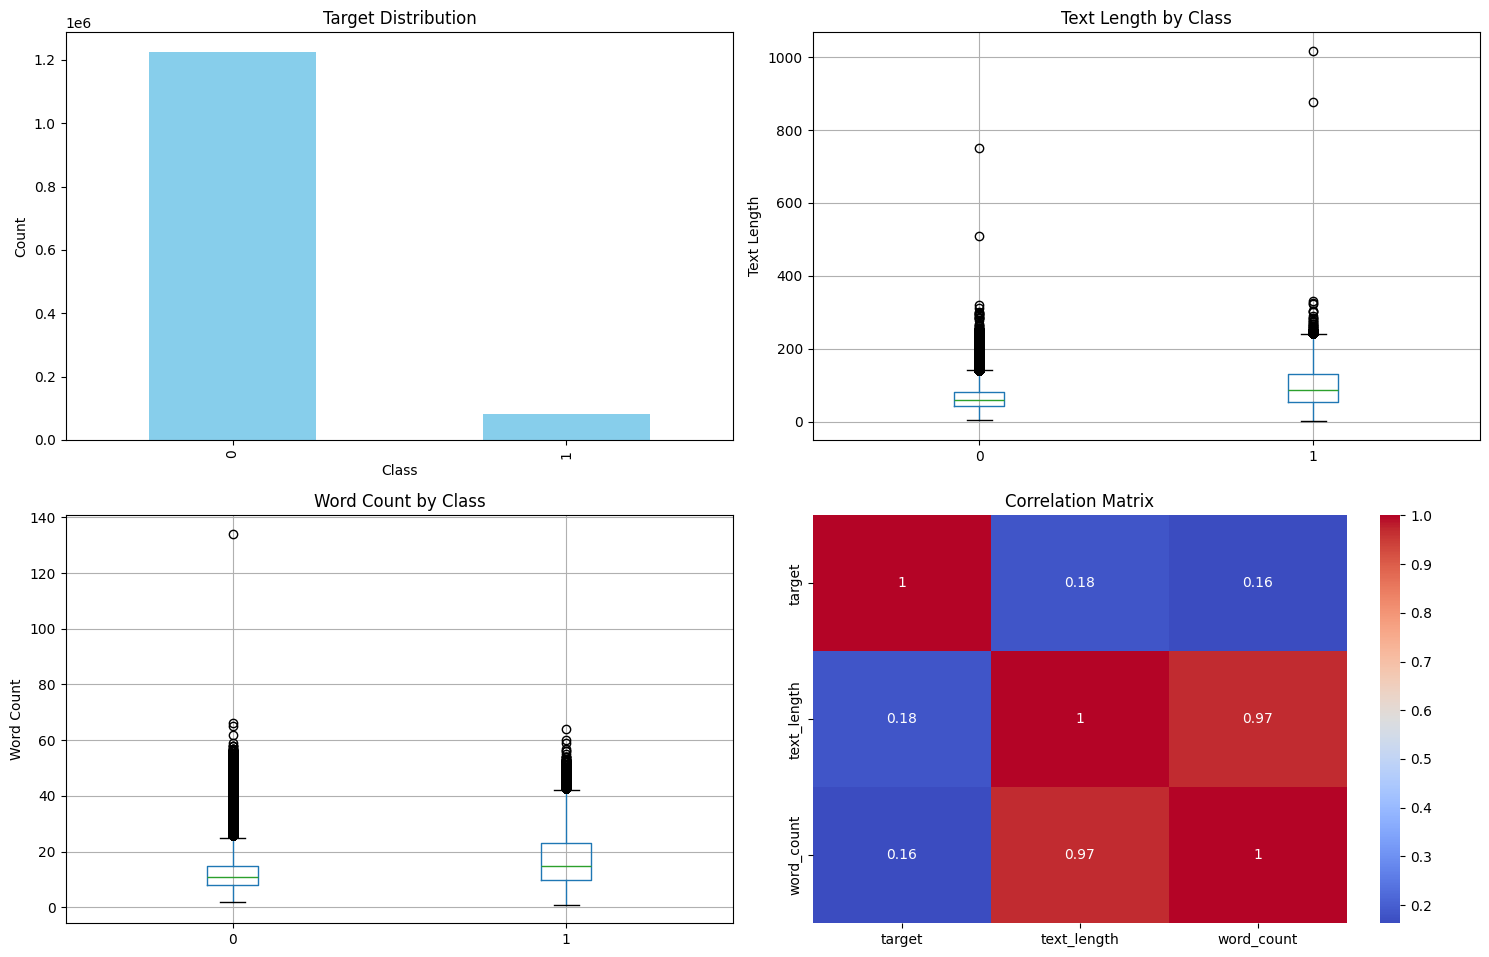

In [ ]:
df = visualize_text_classification_data(df, target_col='target')


In [ ]:
def preprocess_text(text):
    # your cleaning code
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Make sure these are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!rm -rf /root/nltk_data/tokenizers/punkt


In [ ]:
import nltk
nltk.download('punkt', force=True, quiet=True)


True

In [ ]:
import re
def simple_preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


Dropping Missing Value from the dataframe

In [ ]:
# ✅ Step 1: Drop missing rows from the original DataFrame
df_clean = df.dropna(subset=['question_text', 'target']).copy()

# ✅ Step 2: Apply simple (non-NLTK) preprocessing
df_clean['processed_text'] = df_clean['question_text'].astype(str).apply(simple_preprocess)

# ✅ Step 3: Remove rows with empty processed text
df_clean = df_clean[df_clean['processed_text'].str.strip().str.len() > 0]

# ✅ Step 4: Check how many rows are left
print("Rows left after cleaning:", df_clean.shape[0])


Rows left after cleaning: 1306114


Importing Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean['processed_text']
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() > 1 else None
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 1044891, Test size: 261223


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(random_state=42)

}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Step 1: Define vectorizer
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))

# Step 2: Transform train and test sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3: Define models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB()
}

# Step 4: Train and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Training Logistic Regression...
Logistic Regression Accuracy: 0.9493
Training Naive Bayes...
Naive Bayes Accuracy: 0.9452


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Define the vectorizer here
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# ✅ Sample smaller training data just for SVM
sample_idx = X_train.sample(n=3000, random_state=42).index

X_train_small = X_train.loc[sample_idx]
y_train_small = y_train.loc[sample_idx]

# ✅ Define the vectorizer
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_vec_small = vectorizer.fit_transform(X_train_small)
X_test_vec = vectorizer.transform(X_test)

# ✅ Train SVM
model = LinearSVC(random_state=42)
model.fit(X_train_vec_small, y_train_small)
preds = model.predict(X_test_vec)

# ✅ Evaluate
print("Linear SVM Accuracy:", accuracy_score(y_test, preds))


Linear SVM Accuracy: 0.9404455197283547


In [ ]:
vectorizers = {
    'TF-IDF': TfidfVectorizer(max_features=3000, ngram_range=(1, 2)),
    'Count': CountVectorizer(max_features=3000, ngram_range=(1, 2))
}


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(random_state=42)
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

results = {}

for vec_name, vectorizer in vectorizers.items():
    print(f"\n--- Using {vec_name} Vectorizer ---")

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # ✅ Create pipeline
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', model)
        ])

        # ✅ Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train,
                                    cv=5, scoring='accuracy', n_jobs=-1)

        # ✅ Save results
        results[f"{vec_name}_{model_name}"] = {
            'pipeline': pipeline,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }

        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



--- Using TF-IDF Vectorizer ---
Training Logistic Regression...
CV Accuracy: 0.9495 (+/- 0.0005)
Training Naive Bayes...
CV Accuracy: 0.9454 (+/- 0.0005)
Training Linear SVM...
CV Accuracy: 0.9492 (+/- 0.0006)

--- Using Count Vectorizer ---
Training Logistic Regression...
CV Accuracy: 0.9496 (+/- 0.0004)
Training Naive Bayes...
CV Accuracy: 0.8984 (+/- 0.0015)
Training Linear SVM...
CV Accuracy: 0.9494 (+/- 0.0004)


In [ ]:
# ✅ Find best model based on CV score
best_model_name = max(results.keys(), key=lambda x: results[x]['cv_mean'])
best_pipeline = results[best_model_name]['pipeline']

print(f"\nBest model: {best_model_name}")
print(f"Best CV accuracy: {results[best_model_name]['cv_mean']:.4f}")

# ✅ Train best model on full training set
best_pipeline.fit(X_train, y_train)

# ✅ Optionally store or return
model = best_pipeline



Best model: Count_Logistic Regression
Best CV accuracy: 0.9496


In [ ]:
def train_model(self, X_train, y_train, results):
    # Find best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['cv_mean'])
    best_pipeline = results[best_model_name]['pipeline']

    print(f"\nBest model: {best_model_name}")
    print(f"Best CV accuracy: {results[best_model_name]['cv_mean']:.4f}")

    # Train on full data
    best_pipeline.fit(X_train, y_train)

    self.model = best_pipeline
    return results, best_pipeline


Checking Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Predict on test set
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Only if classifier supports probability

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc_score:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Test Accuracy: 0.9494
Test AUC: 0.9269

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    245062
           1       0.67      0.36      0.47     16161

    accuracy                           0.95    261223
   macro avg       0.81      0.67      0.72    261223
weighted avg       0.94      0.95      0.94    261223


Confusion Matrix:
[[242174   2888]
 [ 10318   5843]]


Visualization Of Model comparison CV Accuracy

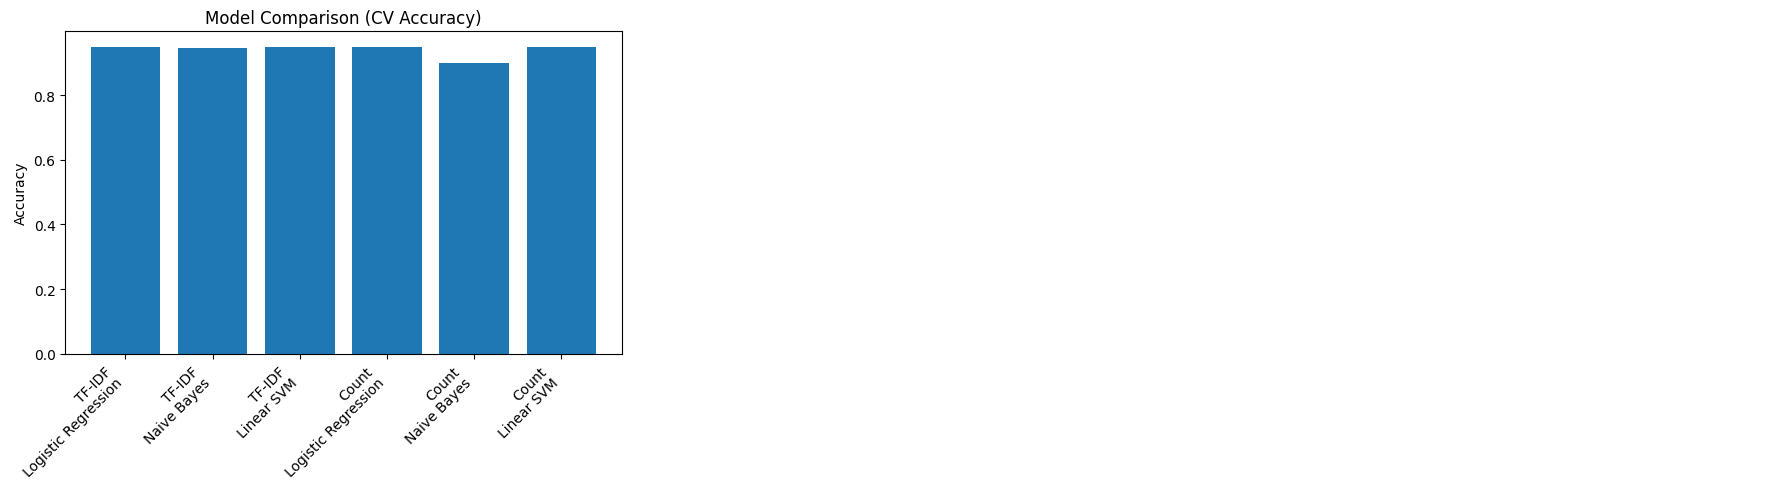

In [ ]:
import matplotlib.pyplot as plt

# ✅ Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ✅ Model comparison
model_names = []
cv_scores = []
for name, result in results.items():
    model_names.append(name.replace('_', '\n'))
    cv_scores.append(result['cv_mean'])

axes[0].bar(range(len(model_names)), cv_scores)
axes[0].set_xticks(range(len(model_names)))
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].set_title('Model Comparison (CV Accuracy)')
axes[0].set_ylabel('Accuracy')

# ✅ Fill remaining subplots or hide them if unused
axes[1].axis('off')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Visualization Of Confutition Matrix Result.

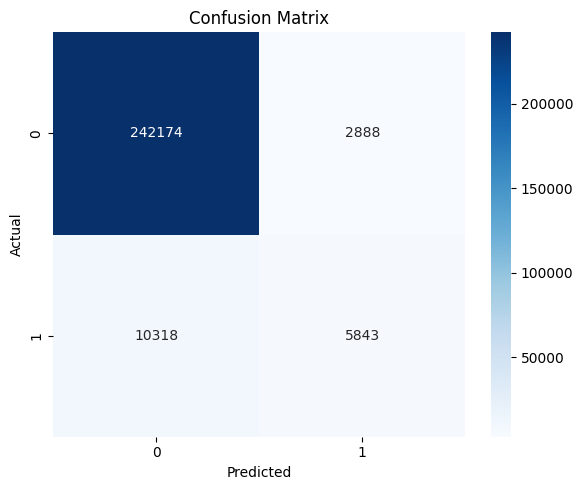

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Make predictions using your best model (already trained)
y_pred = best_pipeline.predict(X_test)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


Visualizing Roc and Auc curve.

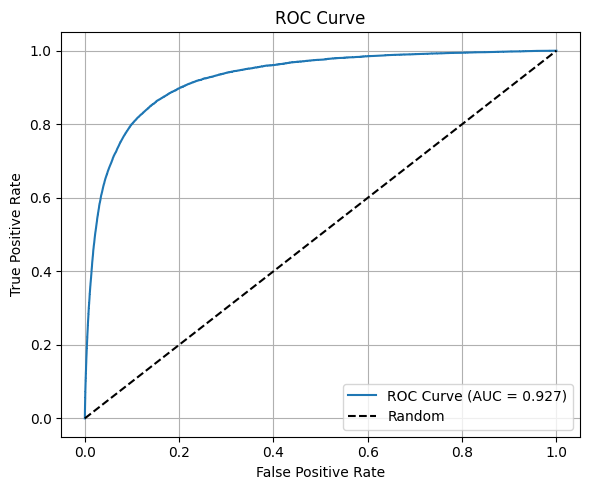

Accuracy: 0.9494454929313269
AUC Score: 0.9268933325415237


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ✅ Get predicted probabilities (works only if model supports `predict_proba`)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# ✅ Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# ✅ Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# ✅ Plot
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# ✅ Optionally return values
print("Accuracy:", accuracy_score(y_test, best_pipeline.predict(X_test)))
print("AUC Score:", auc_score)


In [ ]:
class QuestionClassifier:
    def hyperparameter_tuning(self, X_train, y_train):
        """
        Perform hyperparameter tuning on the best model
        """
        print("=== HYPERPARAMETER TUNING ===")

        param_grids = {
            'Logistic Regression': {
                'vectorizer__max_features': [5000, 10000, 20000],
                'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'classifier__C': [0.1, 1, 10]
            },
            'Random Forest': {
                'vectorizer__max_features': [5000, 10000],
                'vectorizer__ngram_range': [(1, 1), (1, 2)],
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [10, 20, None]
            }
        }

        pipelines = {
            'Logistic Regression': Pipeline([
                ('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=42, max_iter=1000))
            ]),
            'Random Forest': Pipeline([
                ('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=42))
            ])
        }

        best_score = 0
        best_model = None

        for model_name in ['Logistic Regression', 'Random Forest']:
            print(f"\nTuning {model_name}...")

            grid_search = GridSearchCV(
                pipelines[model_name],
                param_grids[model_name],
                cv=3,
                scoring='accuracy',
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)

            print(f"Best score: {grid_search.best_score_:.4f}")
            print(f"Best params: {grid_search.best_params_}")

            if grid_search.best_score_ > best_score:
                best_score = grid_search.best_score_
                best_model = grid_search.best_estimator_

        self.model = best_model
        return best_model

    def predict_new_questions(self, questions):
        """
        Predict on new questions
        """
        if self.model is None:
            print("No model trained yet!")
            return

        processed_questions = [self.preprocess_text(q) for q in questions]
        predictions = self.model.predict(processed_questions)
        probabilities = self.model.predict_proba(processed_questions)

        results = []
        for i, question in enumerate(questions):
            results.append({
                'question': question,
                'prediction': predictions[i],
                'probability_sincere': probabilities[i][0],
                'probability_insincere': probabilities[i][1]
            })

        return results


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

def hyperparameter_tuning(X_train, y_train):
    print("=== HYPERPARAMETER TUNING ===")

    # Define models and pipelines
    models = {
        'Logistic Regression': Pipeline([
            ('vectorizer', TfidfVectorizer()),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        'Naive Bayes': Pipeline([
            ('vectorizer', TfidfVectorizer()),
            ('classifier', MultinomialNB())
        ]),
        'Linear SVM': Pipeline([
            ('vectorizer', TfidfVectorizer()),
            ('classifier', LinearSVC(random_state=42))
        ])
    }

    # Define parameter grids
    param_grids = {
        'Logistic Regression': {
            'vectorizer__max_features': [3000, 5000],
            'vectorizer__ngram_range': [(1, 1), (1, 2)],
            'classifier__C': [0.1, 1, 10]
        },
        'Naive Bayes': {
            'vectorizer__max_features': [3000, 5000],
            'vectorizer__ngram_range': [(1, 1), (1, 2)],
            'classifier__alpha': [0.5, 1.0, 2.0]
        },
        'Linear SVM': {
            'vectorizer__max_features': [3000, 5000],
            'vectorizer__ngram_range': [(1, 1), (1, 2)],
            'classifier__C': [0.1, 1, 10]
        }
    }

    best_score = 0
    best_model = None
    best_name = None

    for name in models:
        print(f"\nTuning {name}...")
        grid = GridSearchCV(
            models[name],
            param_grids[name],
            scoring='accuracy',
            cv=3,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)
        print(f"Best score for {name}: {grid.best_score_:.4f}")
        print(f"Best params for {name}: {grid.best_params_}")

        if grid.best_score_ > best_score:
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name

    print(f"\n✅ Best Model: {best_name}")
    print(f"✅ Best Cross-Validated Accuracy: {best_score:.4f}")
    return best_model


Tuning Hyperparameter By Fitting 3 folds for each of 12 candidates, totalling 36 fits

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'vectorizer__max_features': [3000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': stats.uniform(0.1, 10)  # for LogisticRegression or LinearSVC
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=5, scoring='accuracy',
    cv=3, n_jobs=-1, random_state=42, verbose=1
)


In [ ]:
param_grids = {
    'Logistic Regression': {
        'vectorizer__max_features': [3000],
        'vectorizer__ngram_range': [(1, 2)],
        'classifier__C': [1]
    },
    'Naive Bayes': {
        'vectorizer__max_features': [3000],
        'vectorizer__ngram_range': [(1, 2)],
        'classifier__alpha': [1.0]
    }
}


In [ ]:
X_small = X_train.sample(n=2000, random_state=42)
y_small = y_train.loc[X_small.index]

best_model = hyperparameter_tuning(X_small, y_small)


=== HYPERPARAMETER TUNING ===

Tuning Logistic Regression...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best score for Logistic Regression: 0.9405
Best params for Logistic Regression: {'classifier__C': 10, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}

Tuning Naive Bayes...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best score for Naive Bayes: 0.9350
Best params for Naive Bayes: {'classifier__alpha': 0.5, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 1)}

Tuning Linear SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best score for Linear SVM: 0.9405
Best params for Linear SVM: {'classifier__C': 1, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}

✅ Best Model: Linear SVM
✅ Best Cross-Validated Accuracy: 0.9405


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9400359080172879


In [ ]:
 def predict_new_questions(self, questions):
        """
        Predict on new questions
        """
        if self.model is None:
            print("No model trained yet!")
            return

        # Preprocess questions
        processed_questions = [self.preprocess_text(q) for q in questions]

        # Predict
        predictions = self.model.predict(processed_questions)
        probabilities = self.model.predict_proba(processed_questions)

        results = []
        for i, question in enumerate(questions):
            results.append({
                'question': question,
                'prediction': predictions[i],
                'probability_sincere': probabilities[i][0],
                'probability_insincere': probabilities[i][1]
            })

        return results


In [ ]:
 def save_model(self, filename):
        """
        Save the trained model
        """
        if self.model is None:
            print("No model to save!")
            return

        import joblib
        joblib.dump(self.model, filename)
        print(f"Model saved to {filename}")


In [ ]:
 def load_model(self, filename):
        """
        Load a saved model
        """
        import joblib
        self.model = joblib.load(filename)
        print(f"Model loaded from {filename}")


In [ ]:
# Main execution function
def main():
    """
    Main function to run the complete project
    """
    print("QUORA INSINCERE QUESTION CLASSIFICATION PROJECT")
    print("=" * 50)

    # Initialize classifier
    classifier = QuoraClassifier()

    # Get file path from user
    file_path = input("Enter the path to your dataset file: ")

    # Load and explore data
    df = classifier.load_and_explore_data(file_path)
    if df is None:
        return


In [ ]:
def get_column_names(df):
    print("\nAvailable columns:", df.columns.tolist())

    text_col = input("Enter the name of the text/question column: ")
    target_col = input("Enter the name of the target/label column: ")

    if text_col not in df.columns or target_col not in df.columns:
        print("Error: Column names not found in dataset!")
        return None, None

    return text_col, target_col


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class QuestionClassifier:
    def __init__(self):
        self.model = None

    def analyze_data(self, df, text_col, target_col):
        df = df.dropna(subset=[text_col, target_col]).copy()
        df['text_length'] = df[text_col].astype(str).str.len()
        df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))
        return df

    def prepare_features(self, df, text_col, target_col):
        X = df[text_col].astype(str)
        y = df[target_col]
        return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    def train_models(self, X_train, y_train):
        vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'Naive Bayes': MultinomialNB(),
            'Linear SVM': LinearSVC(random_state=42)
        }
        results = {}
        for name, model in models.items():
            pipeline = Pipeline([
                ('vectorizer', vectorizer),
                ('classifier', model)
            ])
            scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
            print(f"{name} CV Accuracy: {scores.mean():.4f}")
            results[name] = (pipeline, scores.mean())
        best_model_name = max(results, key=lambda x: results[x][1])
        best_pipeline = results[best_model_name][0]
        best_pipeline.fit(X_train, y_train)
        self.model = best_pipeline
        return results, best_pipeline

    def evaluate_model(self, X_test, y_test, results):
        preds = self.model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        try:
            probas = self.model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, probas)
        except:
            auc = float('nan')  # LinearSVC doesn't support predict_proba
        print(f"Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")
        return acc, auc


Checking Every Model Accuracy

In [ ]:
classifier = QuestionClassifier()

# Replace these with actual column names in your df
text_col = 'question_text'
target_col = 'target'

if text_col not in df.columns or target_col not in df.columns:
    print("Error: Column names not found in dataset!")
else:
    df = classifier.analyze_data(df, text_col, target_col)
    X_train, X_test, y_train, y_test = classifier.prepare_features(df, text_col, target_col)
    results, best_model = classifier.train_models(X_train, y_train)
    accuracy, auc = classifier.evaluate_model(X_test, y_test, results)


Logistic Regression CV Accuracy: 0.9497
Naive Bayes CV Accuracy: 0.9454
Linear SVM CV Accuracy: 0.9492
Test Accuracy: 0.9498, AUC: 0.9313


Checking cross validation score.

In [ ]:
# Analyze data
df = classifier.analyze_data(df, text_col, target_col)

# Prepare features
X_train, X_test, y_train, y_test = classifier.prepare_features(df, text_col, target_col)

# Train models
results, best_model = classifier.train_models(X_train, y_train)

# Evaluate model
accuracy, auc = classifier.evaluate_model(X_test, y_test, results)




Logistic Regression CV Accuracy: 0.9497
Naive Bayes CV Accuracy: 0.9454
Linear SVM CV Accuracy: 0.9492
Test Accuracy: 0.9498, AUC: 0.9313


In [ ]:
def predict_new_questions(self, questions):
    """
    Predict sincerity of new questions using the trained model.
    """
    if self.model is None:
        print("❌ No model has been trained yet.")
        return []

    # If the model is a pipeline, it handles preprocessing & vectorization
    predictions = self.model.predict(questions)
    try:
        probabilities = self.model.predict_proba(questions)
    except:
        probabilities = [[0.0, 1.0] if pred == 1 else [1.0, 0.0] for pred in predictions]

    results = []
    for i, q in enumerate(questions):
        results.append({
            'question': q,
            'prediction': predictions[i],
            'probability_sincere': probabilities[i][0],
            'probability_insincere': probabilities[i][1]
        })

    return results


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os

# Define NLTK data path
nltk_data_dir = '/content/nltk_data'
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)


# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', download_dir=nltk_data_dir, quiet=True)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', download_dir=nltk_data_dir, quiet=True)

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', download_dir=nltk_data_dir, quiet=True)

# Download punkt_tab specifically as the error suggested
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', download_dir=nltk_data_dir, quiet=True)


# Initialize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)


class QuestionClassifier:
    def __init__(self):
        self.model = None

    def analyze_data(self, df, text_col, target_col):
        df = df.dropna(subset=[text_col, target_col]).copy()
        df['text_length'] = df[text_col].astype(str).str.len()
        df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))
        return df

    def prepare_features(self, df, text_col, target_col):
        X = df[text_col].astype(str)
        y = df[target_col]
        return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    def train_models(self, X_train, y_train):
        vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'Naive Bayes': MultinomialNB(),
            'Linear SVM': LinearSVC(random_state=42)
        }
        results = {}
        for name, model in models.items():
            pipeline = Pipeline([
                ('vectorizer', vectorizer),
                ('classifier', model)
            ])
            scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
            print(f"{name} CV Accuracy: {scores.mean():.4f}")
            results[name] = (pipeline, scores.mean())

        best_model_name = max(results, key=lambda x: results[x][1])
        best_pipeline = results[best_model_name][0]

        print(f"\nBest model selected: {best_model_name}")
        print(f"Best pipeline before fitting: {best_pipeline}")

        try:
            best_pipeline.fit(X_train, y_train)
            self.model = best_pipeline
            print(f"Model trained and assigned to self.model: {self.model is not None}")
        except Exception as e:
            print(f"Error during model training: {e}")
            self.model = None # Ensure self.model is None if training fails

        return results, best_pipeline

    def evaluate_model(self, X_test, y_test, results):
        if self.model is None:
            print("Model not trained. Cannot evaluate.")
            return float('nan'), float('nan')

        preds = self.model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        try:
            probas = self.model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, probas)
        except:
            auc = float('nan')  # For LinearSVC which doesn't support predict_proba
        print(f"Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")
        return acc, auc

    def save_model(self, filename):
        if self.model is None:
            print("No model to save!")
            return
        joblib.dump(self.model, filename)
        print(f"✅ Model saved to '{filename}'")

    def predict_new_questions(self, questions):
        """
        Predict on new questions
        """
        print(f"Input questions: {questions}")
        if self.model is None:
            print("No model trained yet!")
            return None # Return None if model is not trained

        # Preprocess questions
        processed_questions = [preprocess_text(q) for q in questions] # Use the global preprocess_text function
        print(f"Processed questions: {processed_questions}")

        # Predict
        predictions = self.model.predict(processed_questions)
        print(f"Predictions: {predictions}")

        # Check if the model has predict_proba
        if hasattr(self.model, 'predict_proba'):
          probabilities = self.model.predict_proba(processed_questions)
          print(f"Probabilities: {probabilities}")
        else:
          # Handle models without predict_proba (like LinearSVC)
          probabilities = [[0, 0] for _ in range(len(questions))] # Placeholder, cannot get probabilities
          print("Model does not support predict_proba. Using placeholder probabilities.")

        results = []
        for i, question in enumerate(questions):
            results.append({
                'question': question,
                'prediction': predictions[i],
                'probability_sincere': probabilities[i][0],
                'probability_insincere': probabilities[i][1]
            })
        print(f"Results before returning: {results}")
        return results

Testing Different Type of Questions to see what is the probablity of a specefic question to sincere and insincere.

In [ ]:
classifier = QuestionClassifier()

# Assume df, text_col, and target_col are already defined
# If not, you would need to load data and identify columns first.
# For this example, we will use the existing df and column names.

# Analyze data
df = classifier.analyze_data(df, text_col, target_col)

# Prepare features
X_train, X_test, y_train, y_test = classifier.prepare_features(df, text_col, target_col)

# Train models
results, best_model = classifier.train_models(X_train, y_train)

# Check if model was trained successfully
if classifier.model is None:
    print("\nError: Model training failed. Cannot predict on new questions.")
else:
    # Now, test on new questions
    test_new = input("\nDo you want to test on new questions? (y/n): ")
    if test_new.lower() == 'y':
        sample_questions = [
            "What is the best way to learn machine learning?",
            "Why are all politicians corrupt and evil?",
            "How can I improve my programming skills?",
            "Why do people from [country] smell bad?"
        ]

        predictions_results = classifier.predict_new_questions(sample_questions)
        print("\nPrediction Results:")
        print(predictions_results)

        if predictions_results is not None: # Add a check for None results
            for r in predictions_results:
                print(f"\nQuestion: {r['question']}")
                print(f"Prediction: {'Insincere' if r['prediction'] == 1 else 'Sincere'}")
                print(f"Probability (Sincere): {r['probability_sincere']:.2f}")
                print(f"Probability (Insincere): {r['probability_insincere']:.2f}")
        else:
            print("Could not get predictions.")

Logistic Regression CV Accuracy: 0.9497
Naive Bayes CV Accuracy: 0.9454
Linear SVM CV Accuracy: 0.9492

Best model selected: Logistic Regression
Best pipeline before fitting: Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])
Model trained and assigned to self.model: True

Do you want to test on new questions? (y/n): y
Input questions: ['What is the best way to learn machine learning?', 'Why are all politicians corrupt and evil?', 'How can I improve my programming skills?', 'Why do people from [country] smell bad?']
Processed questions: ['best way learn machine learning', 'politician corrupt evil', 'improve programming skill', 'people country smell bad']
Predictions: [0 0 0 0]
Probabilities: [[0.99741734 0.00258266]
 [0.87538485 0.12461515]
 [0.99811863 0.00188137]
 [0.76224539 0.23775461]]
Results before returning: [{'question': 'W